In [60]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.utils import np_utils
import pandas as pd

In [61]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

In [73]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [74]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [75]:
ytest = y_test
ytrain = y_train

In [76]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [65]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation

In [66]:
model = Sequential()
model.add(Dense(units=100,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=100,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_37 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_38 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [67]:
train_history=model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), validation_split=0.2, epochs=10, batch_size=128, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.5639 - acc: 0.8882 - val_loss: 0.1861 - val_acc: 0.9458
Epoch 2/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.1541 - acc: 0.9543 - val_loss: 0.1509 - val_acc: 0.9549
Epoch 3/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.1077 - acc: 0.9671 - val_loss: 0.1352 - val_acc: 0.9610
Epoch 4/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0885 - acc: 0.9724 - val_loss: 0.1581 - val_acc: 0.9593
Epoch 5/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0804 - acc: 0.9750 - val_loss: 0.1228 - val_acc: 0.9650
Epoch 6/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0712 - acc: 0.9786 - val_loss: 0.1324 - val_acc: 0.9666
Epoch 7/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.0687 - acc: 0.9788 - val_loss: 0.1524 - val_acc

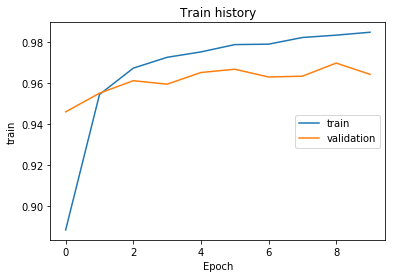

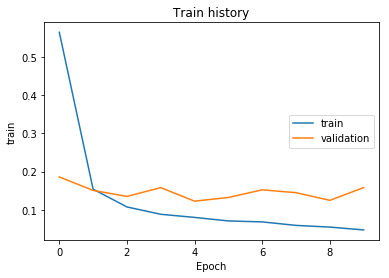

In [68]:
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

In [69]:
predictiontest = model.predict_classes(x_test)
predictiontrain = model.predict_classes(x_train)

In [77]:
pd.crosstab(ytrain,predictiontrain,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,5886,1,2,0,0,6,2,0,18,8
1,0,6705,4,1,4,0,0,5,9,14
2,14,20,5766,77,2,0,3,14,55,7
3,5,3,1,5979,0,28,0,2,45,68
4,8,4,6,1,5749,0,5,4,11,54
5,1,0,1,13,3,5343,2,0,23,35
6,43,1,4,2,1,32,5796,0,35,4
7,0,8,6,3,11,6,0,6124,13,94
8,3,13,1,9,3,4,1,1,5774,42


In [78]:
pd.crosstab(ytest,predictiontest,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,962,0,1,2,1,4,0,1,4,5
1,0,1127,0,1,1,0,1,0,5,0
2,5,6,971,19,1,1,2,5,19,3
3,0,0,3,967,0,9,0,3,12,16
4,3,2,5,1,947,1,0,0,4,19
5,3,0,1,4,1,862,1,0,13,7
6,8,3,3,1,5,13,915,0,9,1
7,0,6,9,4,4,0,0,970,9,26
8,2,2,1,8,1,3,0,3,940,14


In [79]:
model = Sequential()
model.add(Dense(units=100,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=100,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [80]:
train_history_dropout=model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), validation_split=0.2, epochs=20, batch_size=128, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 40us/step - loss: 2.5324 - acc: 0.6052 - val_loss: 0.4347 - val_acc: 0.8914
Epoch 2/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.6786 - acc: 0.8126 - val_loss: 0.3132 - val_acc: 0.9174
Epoch 3/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.5204 - acc: 0.8584 - val_loss: 0.2778 - val_acc: 0.9254
Epoch 4/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.4519 - acc: 0.8770 - val_loss: 0.2421 - val_acc: 0.9383
Epoch 5/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.4185 - acc: 0.8874 - val_loss: 0.2245 - val_acc: 0.9384
Epoch 6/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.3906 - acc: 0.8938 - val_loss: 0.2277 - val_acc: 0.9408
Epoch 7/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.3790 - acc: 0.8988 - val_loss: 0.2076 - val_acc

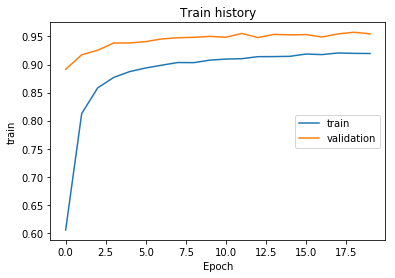

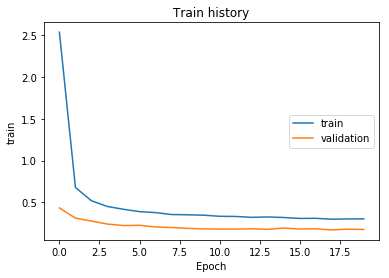

In [81]:
show_train_history(train_history_dropout,'acc','val_acc')
show_train_history(train_history_dropout,'loss','val_loss')

In [82]:
predictiontest_drop = model.predict_classes(x_test)
predictiontrain_drop = model.predict_classes(x_train)

In [83]:
pd.crosstab(ytrain,predictiontrain_drop,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,5845,0,5,0,2,0,8,2,59,2
1,1,6635,46,4,2,0,2,8,39,5
2,18,8,5795,16,7,1,11,33,67,2
3,11,4,149,5815,0,30,0,42,66,14
4,14,13,64,0,5592,1,42,6,47,63
5,38,5,16,106,1,5129,40,3,65,18
6,27,6,26,0,3,35,5776,1,44,0
7,11,20,62,3,9,1,1,6119,13,26
8,25,34,25,19,5,22,15,1,5693,12


In [84]:
pd.crosstab(ytest,predictiontest_drop,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,968,0,0,1,1,0,4,2,4,0
1,0,1115,4,1,0,1,2,0,12,0
2,4,1,988,4,3,0,3,9,19,1
3,3,0,24,955,0,7,0,9,12,0
4,3,0,13,1,927,0,14,1,11,12
5,7,1,3,27,3,821,6,2,20,2
6,9,3,3,0,1,7,927,0,8,0
7,3,7,18,2,3,0,0,983,5,7
8,6,2,5,8,7,6,6,3,929,2
